In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Auxiliar Functions

In [3]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge((r,g,b)) # merge in rgb order to display with matplotlib

In [4]:
# power law tranformation
def power_law_lut(c, g):
    table = np.zeros(256,'uint8')

    table = np.array([( c * (i / 255.0) ** g) * 255 for i in np.arange(0, 256)]).astype("uint8")

    return np.array([table.astype('uint8')])

In [7]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# Iris

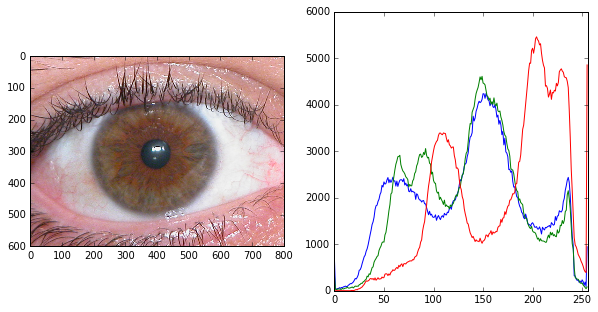

In [8]:


img = cv2.imread('../colorImages/iris.jpg')
img1 = cv2.imread('../colorImages/iris_1.jpg')
img2 = cv2.imread('../colorImages/iris_2.jpg')
img3 = cv2.imread('../colorImages/iris_3.jpg')
img4 = cv2.imread('../colorImages/iris_4.jpg')

plt.figure(figsize=(10,5)) 

plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    

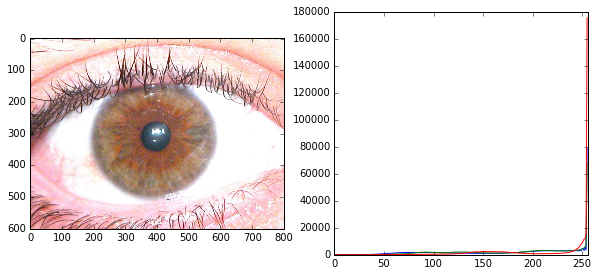

In [9]:
plt.figure(figsize=(10,20)) 

    
plt.subplot(425);plt.imshow(invertChannels(img3))
plt.subplot(426)
for i,col in enumerate(color):
    histr = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  


### Iris_3 Image filtering

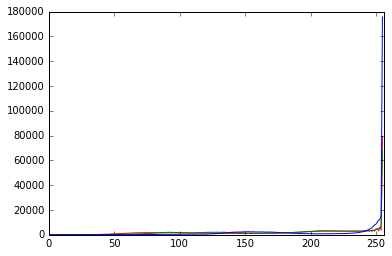

In [197]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img3],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])

# HSI space

In [180]:
import colorsys                 

In [193]:
b,g,r = cv2.split(img3/255.) 

h = np.empty((r.shape[0],r.shape[1]))
s = np.empty((r.shape[0],r.shape[1]))
i = np.empty((r.shape[0],r.shape[1]))

for j in range(r.shape[0]):
    for k in range(r.shape[1]):
        h[j,k],s[j,k],i[j,k] = colorsys.rgb_to_hls(r[j,k],g[j,k],b[j,k])

(0, 10000)

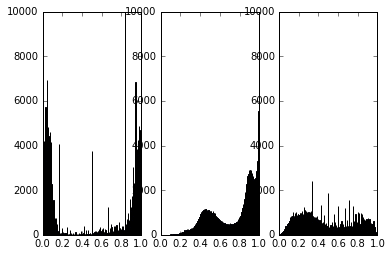

In [194]:
plt.subplot(131)
plt.hist(h.ravel(),len(h),[0,1])
plt.ylim([0,10000])
plt.subplot(132)
plt.hist(s.ravel(),len(s),[0,1])
plt.ylim([0,10000])
plt.subplot(133)
plt.hist(i.ravel(),len(i),[0,1])
plt.ylim([0,10000])

In [195]:
b,g,r = cv2.split(img/255.) 

h = np.empty((r.shape[0],r.shape[1]))
s = np.empty((r.shape[0],r.shape[1]))
i = np.empty((r.shape[0],r.shape[1]))

for j in range(r.shape[0]):
    for k in range(r.shape[1]):
        h[j,k],s[j,k],i[j,k] = colorsys.rgb_to_hls(r[j,k],g[j,k],b[j,k])

(0, 10000)

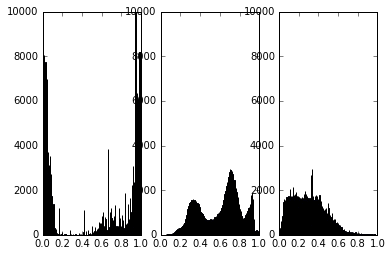

In [196]:
plt.subplot(131)
plt.hist(h.ravel(),len(h),[0,1])
plt.ylim([0,10000])
plt.subplot(132)
plt.hist(s.ravel(),len(s),[0,1])
plt.ylim([0,10000])
plt.subplot(133)
plt.hist(i.ravel(),len(i),[0,1])
plt.ylim([0,10000])

In [58]:
# mean square error comparation
print "MSE between Original and Iris2: %s" % mse(img,img2)
print "MSE between Original and Iris enchanced: %s" % mse(img,img2r)

MSE between Original and Iris2: 4657.85168958
MSE between Original and Iris enchanced: 3905.16489583
